In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv(r'C:\Users\balam\Guvi\Miniproject\claims_data.csv')
data.head()

,Claim_ID,Food_ID,Receiver_ID,Status,Timestamp
0,1,164,908,Pending,3/5/2025 5:26
1,2,353,391,Cancelled,3/11/2025 10:24
2,3,626,492,Completed,3/21/2025 0:59
3,4,61,933,Cancelled,3/4/2025 9:08
4,5,345,229,Pending,3/14/2025 15:17


In [2]:
data.tail()

,Claim_ID,Food_ID,Receiver_ID,Status,Timestamp
995,996,855,211,Completed,3/13/2025 19:40
996,997,980,746,Cancelled,3/17/2025 22:04
997,998,832,967,Cancelled,3/13/2025 18:00
998,999,917,90,Completed,3/1/2025 15:31
999,1000,596,950,Cancelled,3/13/2025 12:51


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Claim_ID     1000 non-null   int64 
 1   Food_ID      1000 non-null   int64 
 2   Receiver_ID  1000 non-null   int64 
 3   Status       1000 non-null   object
 4   Timestamp    1000 non-null   object
dtypes: int64(3), object(2)
memory usage: 39.2+ KB


In [4]:
data.nunique()

Claim_ID       1000
Food_ID         647
Receiver_ID     624
Status            3
Timestamp       976
dtype: int64

In [5]:
data.isnull().sum()

Claim_ID       0
Food_ID        0
Receiver_ID    0
Status         0
Timestamp      0
dtype: int64

In [6]:
(data.isnull().sum()/(len(data)))*100

Claim_ID       0.0
Food_ID        0.0
Receiver_ID    0.0
Status         0.0
Timestamp      0.0
dtype: float64

In [7]:
cat_cols=data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Status', 'Timestamp'], dtype='object')
Numerical Variables:
['Claim_ID', 'Food_ID', 'Receiver_ID']


In [13]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Claim_ID,1000.0,NaN,NaN,NaN,500.5,288.819436,1.0,250.75,500.5,750.25,1000.0
Food_ID,1000.0,NaN,NaN,NaN,502.163,292.462255,1.0,233.75,504.5,762.0,999.0
Receiver_ID,1000.0,NaN,NaN,NaN,492.437,284.487869,1.0,256.0,480.5,742.25,1000.0
Status,1000,3,Completed,339,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Timestamp,1000,976,3/5/2025 1:43,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Claim_ID
Skew : 0.0


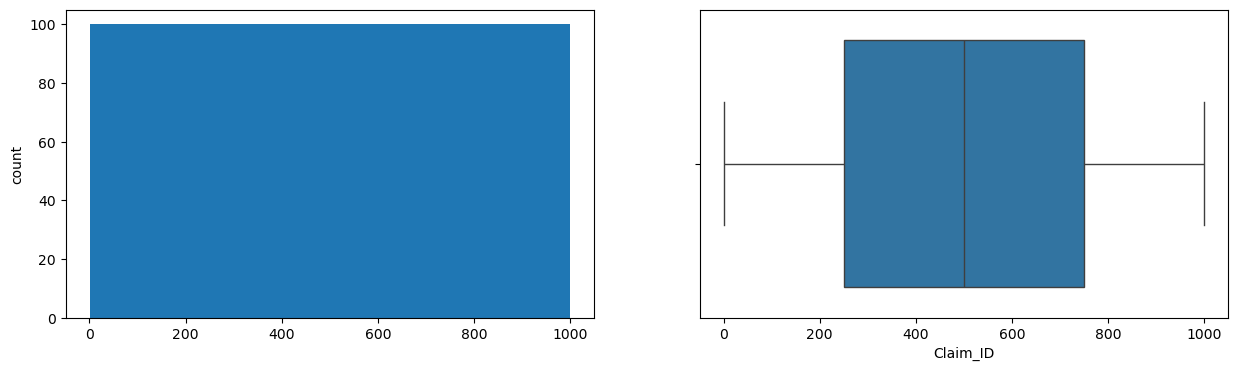

Food_ID
Skew : 0.01


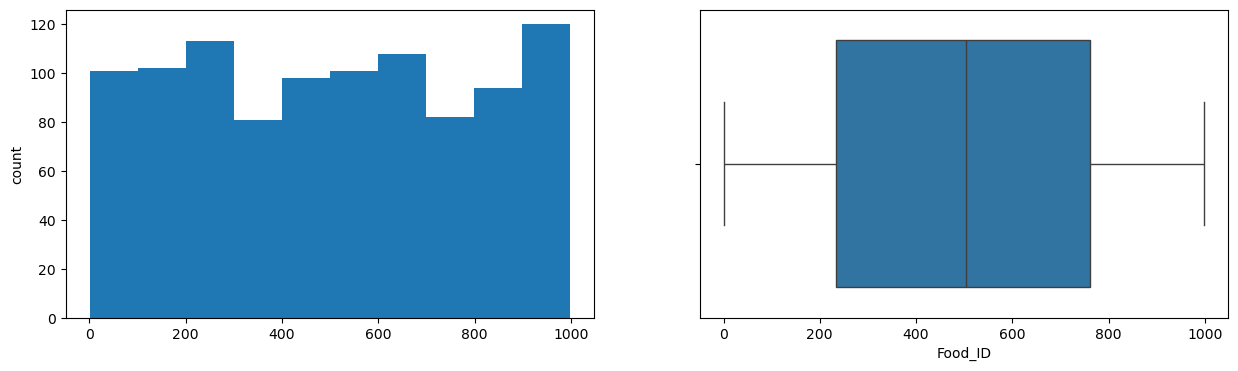

Receiver_ID
Skew : 0.07


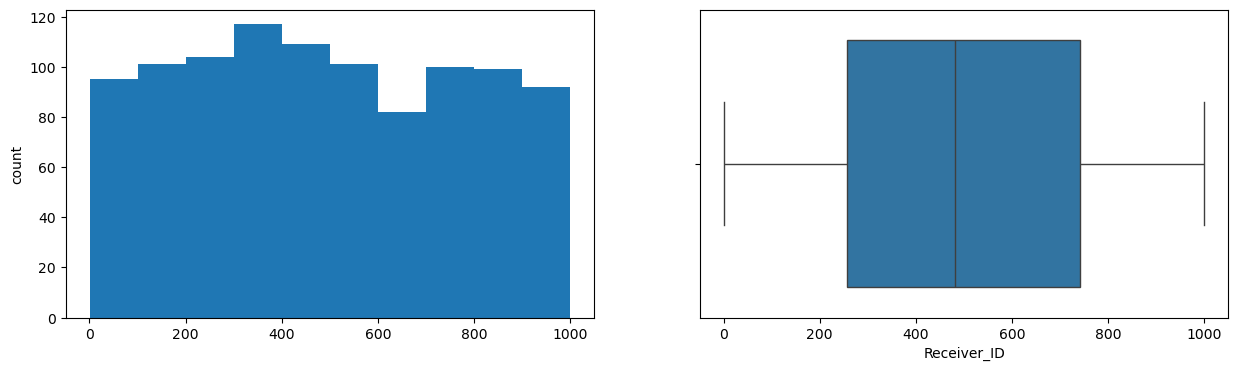

In [8]:
for col in num_cols:
    print(col)
    print('Skew :', round(data[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    data[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.show()

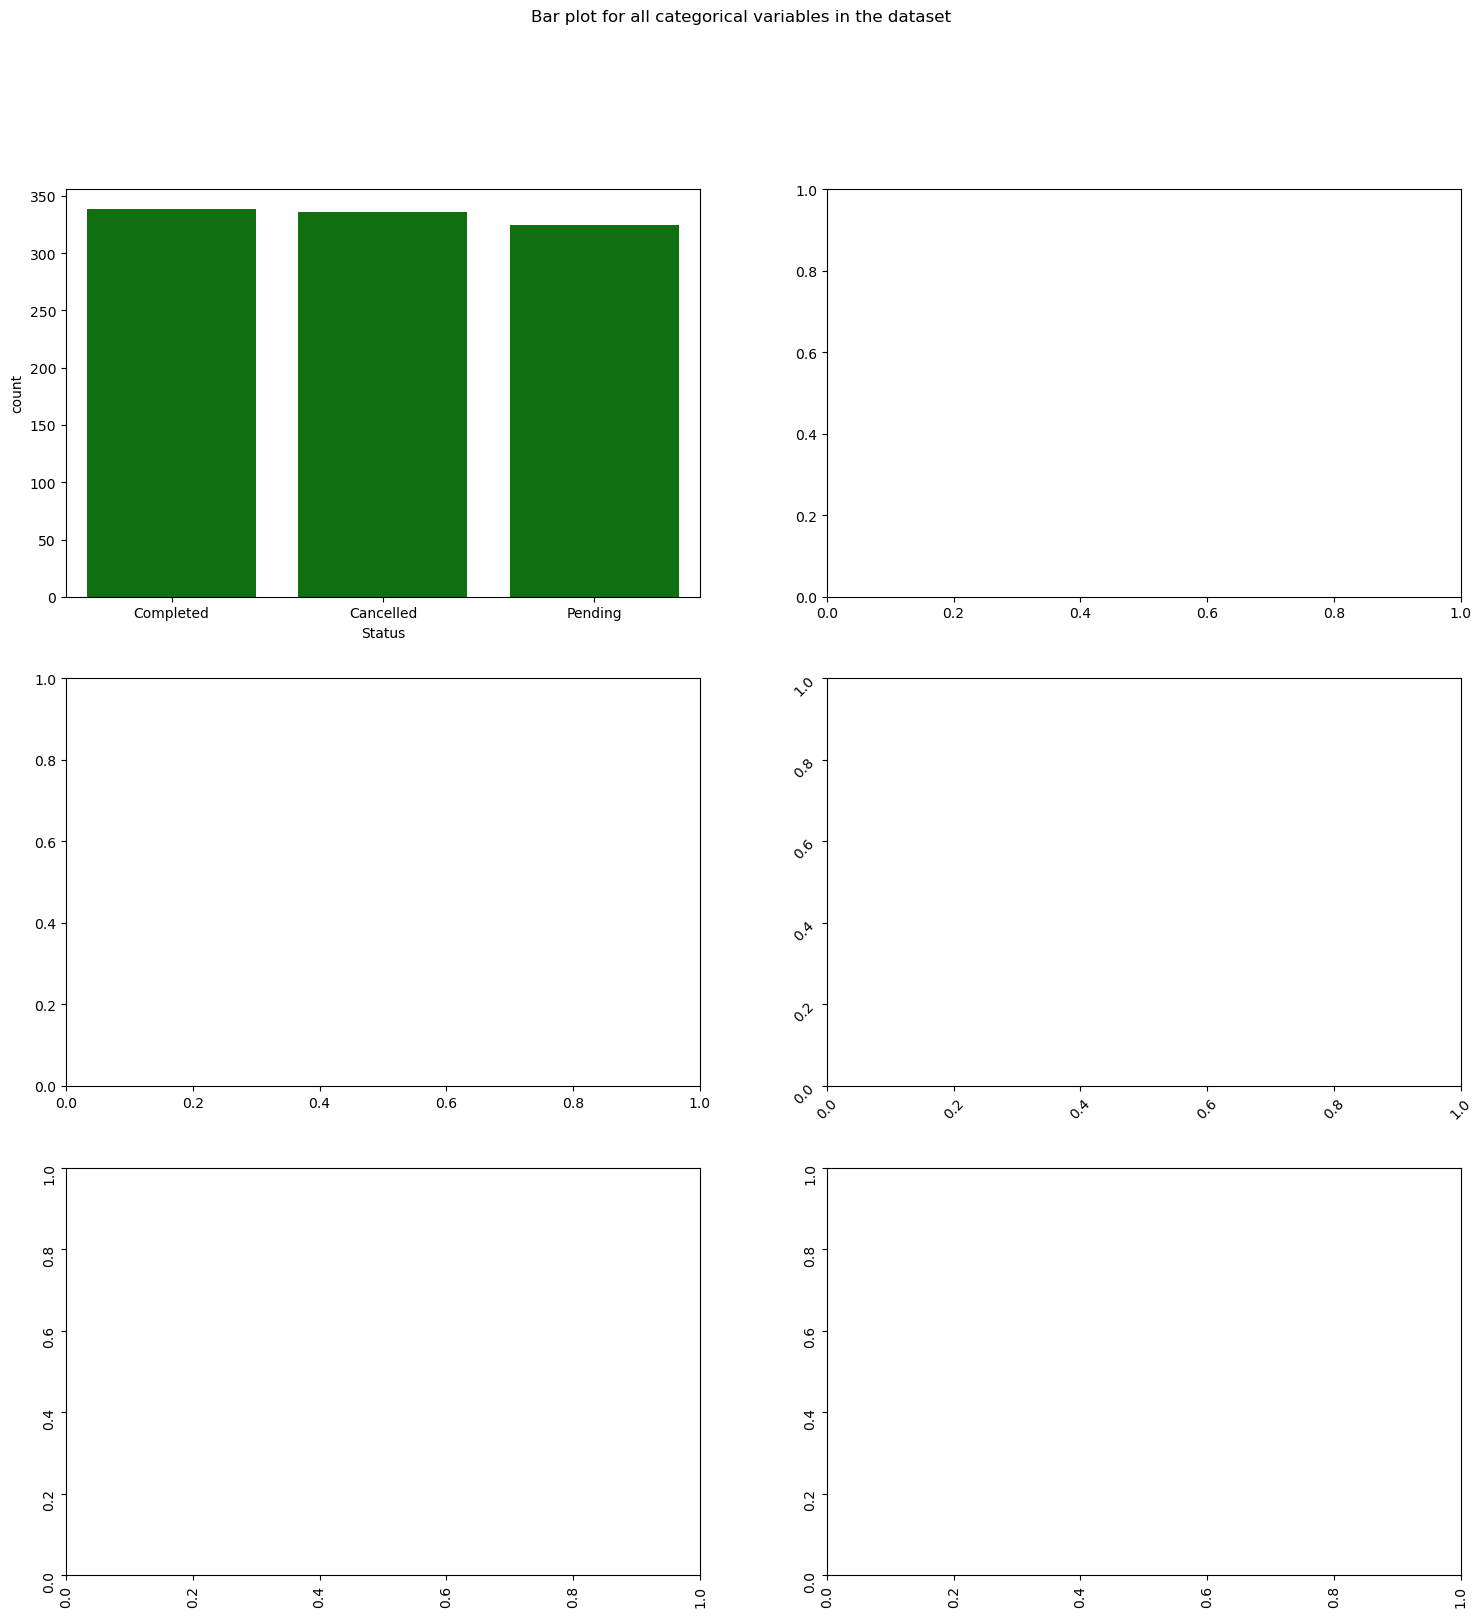

In [11]:
fig, axes = plt.subplots(3, 2, figsize = (18, 18))

fig.suptitle('Bar plot for all categorical variables in the dataset')
sns.countplot(ax = axes[0, 0], x = 'Status', data = data, color = 'green', 
              order = data['Status'].value_counts().index);

axes[1][1].tick_params(labelrotation=45);
axes[2][0].tick_params(labelrotation=90);
axes[2][1].tick_params(labelrotation=90);